# Item-based collaborative filtering

In this notebook I show an example of a recommender system using python 3.

### Dataset

I will use one of the most popular movie datasets, the [MovieLens](https://grouplens.org/datasets/movielens/). The sample of this dataset that we use, called "ml-20m", describes 5-star rating and free-text tagging activity. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset is ideal as it allows us to perform several types or recommender systems.



## 1) Import libraries

In [138]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

## 2) Data exploration

We load the data from the users and movies, that are separated in different datasets. We merge them

In [139]:
df_users = pd.read_csv('../data/users.csv')
df_users.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [140]:
df_movie_titles = pd.read_csv('../data/movies.csv',index_col=False)
df_movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [141]:
df = pd.merge(df_users, df_movie_titles, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [142]:
df_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
df_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [143]:
df_ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
df_ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


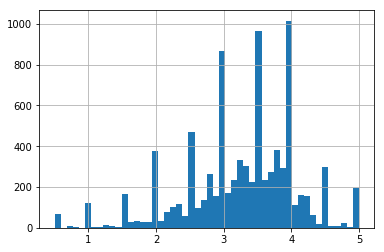

In [144]:
df_ratings['rating'].hist(bins=50)

From the above histogram it is clear that most movies have few ratings. Movies with most ratings are those that are most famous.

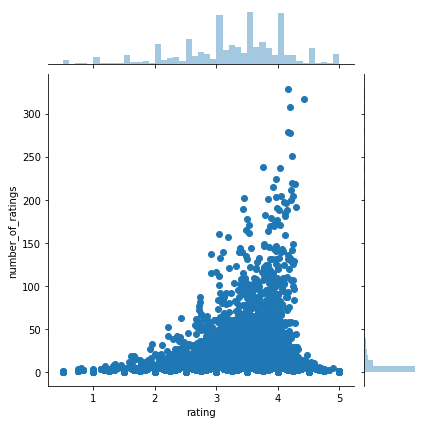

In [145]:
sns.jointplot(x='rating', y='number_of_ratings', data=df_ratings)

In [146]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...,Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df_ratings.sort_values('number_of_ratings', ascending=False).head()


,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [148]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
AFO_user_rating = AFO_user_rating.dropna()
AFO_user_rating.head()

userId
11    4.0
18    3.0
28    2.0
42    4.0
45    4.0
Name: Air Force One (1997), dtype: float64

In [149]:
contact_user_rating = movie_matrix['Contact (1997)']
contact_user_rating = contact_user_rating.dropna()
contact_user_rating.head()

userId
7     5.0
11    5.0
19    3.0
27    4.0
28    3.5
Name: Contact (1997), dtype: float64

In [161]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)
similar_to_air_force_one.dropna().head()

title
'burbs, The (1989)                   0.168459
(500) Days of Summer (2009)          0.086874
*batteries not included (1987)      -0.866025
10 Items or Less (2006)             -1.000000
10 Things I Hate About You (1999)   -0.198731
dtype: float64

In [162]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.dropna().head()


title
'burbs, The (1989)                   0.486761
(500) Days of Summer (2009)          0.634064
*batteries not included (1987)       0.868599
...And Justice for All (1979)        1.000000
10 Things I Hate About You (1999)   -0.102640
dtype: float64

In [163]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640


In [164]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),-0.198731


In [166]:
corr_AFO = corr_AFO.join(df_ratings['number_of_ratings'])
corr_AFO .head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Items or Less (2006),-1.000000,3
10 Things I Hate About You (1999),-0.198731,54


In [167]:
corr_contact = corr_contact.join(df_ratings['number_of_ratings'])
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [168]:
corr_AFO[df_ratings['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107
Apollo 13 (1995),0.536136,201
Twister (1996),0.511892,123
American Pie (1999),0.501064,103
"Truman Show, The (1998)",0.500529,125


In [169]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144
